# CAPSTONE PROJECT FOR SPARTA
Detailed data analysis an machine learning of Unemployment and Underemployment rate in the philippines from 2005 to 2020

SPARTA CAPTONE LINK (Basis): http://openstat.psa.gov.ph/

1. Background and Significance of the Project
2. Motivation and Problem Statement
3. Methodology
4. Results and Findings
5. Conclusions and Recommendations

## Background and Significance of Project
The study aims to understand the unemployment and underemployment rate in the Philippines.
Using the data from Philippine Statistics Authority, on Labor Force Participation Rate,
Employment Rate, Unemployment Rate and Underemployment Rate, Philippines (2005 - 2020)

Source: Labor Force Survey from Philippine Statistics Authority

(https://openstat.psa.gov.ph/PXWeb/pxweb/en/DB/DB__1B__LFS/?tablelist=true&rxid=227f6805-9732-41b6-981c-ac178832d6db)


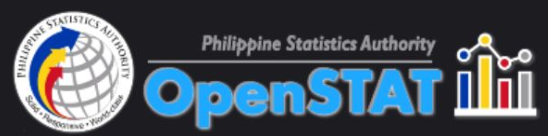

## Motivation and Problem Statement
The study aims to characterized and understand important trends for the annual unemployment
and underemployment rate in the Philippines, from period of 2005 to 2020. The study consist of
the ff.
- Data Characterization using descriptive statistics
- Data Relationship using diagnostic statistics
- Data Trends using predictive statistics

## Methodology
1. Data Collection/Cleaning - Data for annual unemployment and underemployment rate are taken from PSA online.
2. Exploratory Data Analysis - Performed the following analysis with appropriate visualization to characterized data and make predictions on trends.
  - Descriptive Statistics
  - Diagnostic Statistics     
3. Predictive Analytics and Machine Learning - Utilizes linear regression to create a machine learning model
  - Regression/Correlation Analysis
  - Model Training and Development

#### Data Collection and Cleaning

In [1]:
# Import pertinent libraries
import numpy as np
import pandas as pd


In [2]:
# Load the CSV file
data = pd.read_csv("PSA_Labor_Employment_Unemployment_Rate.csv")
data

,Year,Unemployment Rate,Underemployment Rate
0,2005,8.78,20.88
1,2006,7.95,22.55
2,2007,7.33,20.13
3,2008,7.40,19.31
4,2009,7.48,19.07
5,2010,7.35,18.75
6,2011,7.04,19.26
7,2012,6.99,19.98
8,2013,7.08,19.34
9,2014,6.82,18.67


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  16 non-null     int64  
 1   Unemployment Rate     16 non-null     float64
 2   Underemployment Rate  16 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 512.0 bytes


In [4]:
data = data.rename({"Unemployment Rate":"Unemployment","Underemployment Rate":"Underemployment"}, axis='columns')
data

,Year,Unemployment,Underemployment
0,2005,8.78,20.88
1,2006,7.95,22.55
2,2007,7.33,20.13
3,2008,7.40,19.31
4,2009,7.48,19.07
5,2010,7.35,18.75
6,2011,7.04,19.26
7,2012,6.99,19.98
8,2013,7.08,19.34
9,2014,6.82,18.67


#### Exploratory Data Analysis

In [5]:
# Import libraries for visualization
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")

In [6]:
# Decriptive Statics
data.describe(include = 'all')

,Year,Unemployment,Underemployment
count,16.000000,16.000000,16.000000
mean,2012.500000,7.020000,18.607500
std,4.760952,1.328212,2.067848
min,2005.000000,5.070000,14.000000
25%,2008.750000,6.137500,17.852500
50%,2012.500000,7.060000,18.910000
75%,2016.250000,7.420000,19.500000
max,2020.000000,10.260000,22.550000


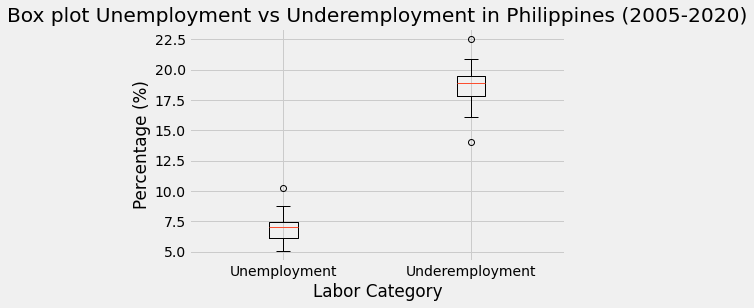

In [7]:
# Visualization Using Box Plot for IQR, Min, Max
plt.boxplot([data.Unemployment, data.Underemployment] , labels = ['Unemployment' , 'Underemployment'])
plt.xlabel('Labor Category')
plt.ylabel('Percentage (%)')
plt.title('Box plot Unemployment vs Underemployment in Philippines (2005-2020)')
plt.show()

From the descriptive analysis and box plot, the mean, meadian and mode, as well as the interquartile range for the underemployment is higher the the undemployment

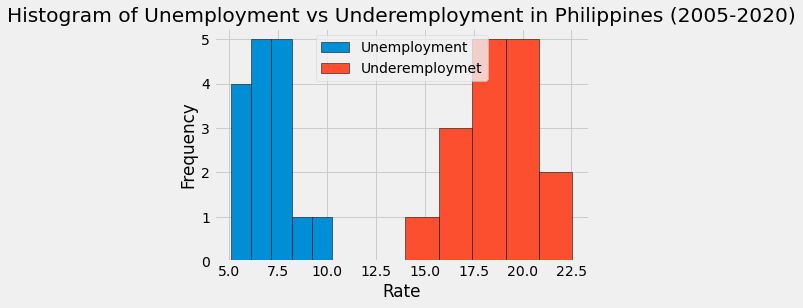

In [8]:
# Visualization using Histogram
plt.hist(data["Unemployment"], bins = 5, edgecolor = "black", label = "Unemployment")
plt.hist(data["Underemployment"], bins = 5, edgecolor = "black", label = "Underemploymet")
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Unemployment vs Underemployment in Philippines (2005-2020)')
plt.show()

In [9]:
# Perform F-Test to check for equlity of variance
import scipy.stats
x = data['Unemployment']
y = data['Underemployment']

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) 
    dfn = x.size-1 
    dfd = y.size-1 
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) 
    return print('the pvalue is: ',p)

In [10]:
f_test(x, y)

the pvalue is:  0.9515651618770922


##### Ho: Variance(unemployment) is equal to Variance (underemployment)
##### Ha: Variance(unemployment) is equal to Variance (underemployment)

INSIGHTS: Since P-value > 0.05, Accept Ho

At 95% confidence level, there is reason to say that the
variances of Unemployment Rate and
Underemployment Rate are **SIGNIFICANTLY EQUAL**

In [11]:
# Perform F-Test to check for equlity of means
from scipy.stats import ttest_ind
ttest,pval  = ttest_ind(x,y)
print('the pvalue is',pval)

the pvalue is 3.465100216966194e-18


##### Ho: Means(unemployment) is equal to Means (underemployment)
##### Ha: Means(unemployment) is equal to Means (underemployment)

INSIGHTS: Since P-value < 0.05, Reject Ho

At 95% confidence level, there is reason to say that the
means of Unemployment Rate and
Underemployment Rate are **SIGNIFICANTLY DIFFERENT**

### Predictive Analytics and Machine Learning

In [12]:
# Import pertinent libraries
import seaborn as sns

(0.0, 10.530833357951725)

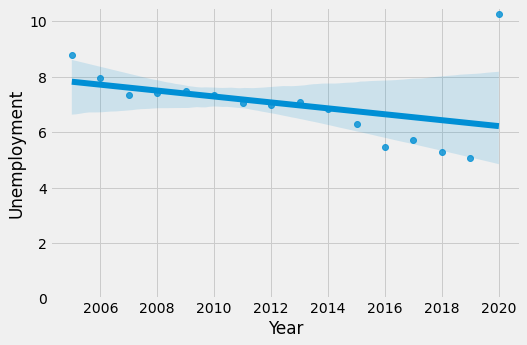

In [13]:
# Regression Plot for Unemployment
width = 7.5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Unemployment", data = data)
plt.ylim(0,)

In [14]:
# Check for Correlation
data[['Year', 'Unemployment']].corr()

,Year,Unemployment
Year,1.000000,-0.383223
Unemployment,-0.383223,1.000000


(0.0, 22.9775)

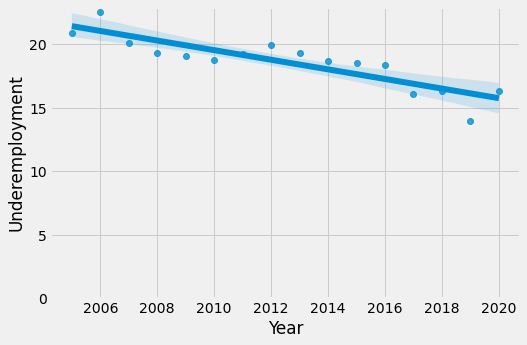

In [15]:
# Regression Plot for Underemployment
width = 7.5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Year", y="Underemployment", data = data)
plt.ylim(0,)

In [16]:
# Check for Correlation
data[['Year', 'Underemployment']].corr()

,Year,Underemployment
Year,1.000000,-0.871312
Underemployment,-0.871312,1.000000


Initial impression: The underemployment rate has a more positive correltaion to the year, compared to unemployment rate, base from regression plots and correlation coefficients

In [17]:
# Import widgets for interactivity
from ipywidgets import interact, interactive, fixed, interact_manual

In [18]:
# Create function for distribution plot
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Year')
    plt.ylabel('Category')

    plt.show()
    plt.close()

In [19]:
# Define x and y, and create train and test data
y_data = data['Year']
x_data=data.drop('Year',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 5
number of training samples: 11


In [20]:
# Import library for linear regression
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

In [21]:
# Regression model for Unemployment
lre.fit(x_train[['Unemployment']], y_train)

LinearRegression()

In [22]:
# R2 score for Unemployment - test data
lre.score(x_test[['Unemployment']], y_test)

0.0275807512295575

In [23]:
# R2 score for Unemployment - train data
lre.score(x_train[['Unemployment']], y_train)

0.09893371819873054

In [24]:
# Regression model for Unemployment
lre.fit(x_train[['Underemployment']], y_train)

LinearRegression()

In [25]:
# R2 score for Underemployment - test data
lre.score(x_test[['Underemployment']], y_test)

0.6732875747076367

In [26]:
# R2 score for Underemployment - train data
lre.score(x_train[['Underemployment']], y_train)

0.7663218126497031

In [27]:
# Import Library for Cross Validation
from sklearn.model_selection import cross_val_score

In [28]:
# Check for the Rcross
Rcross_unemployment = cross_val_score(lre, x_data[['Unemployment']], y_data, cv=4)
Rcross_underemployment = cross_val_score(lre, x_data[['Underemployment']], y_data, cv=4)

print('The cross validation sccore for unemployment is: ', Rcross_unemployment)
print('The cross validation sccore for underemployment is: ', Rcross_underemployment)

The cross validation sccore for unemployment is:  [-46.3358543   -3.9581784   -1.50136397 -95.57532224]
The cross validation sccore for underemployment is:  [-9.6474559  -2.61563694 -6.45700246 -3.78296092]


In [29]:
# Check for Underfiting/Overfiting
lre.fit(x_train[['Unemployment', 'Underemployment']], y_train)

LinearRegression()

In [30]:
yhat_train = lre.predict(x_train[['Unemployment', 'Underemployment']])
yhat_test = lre.predict(x_test[['Unemployment', 'Underemployment']])

C:\Users\Lawrence\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lawrence\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


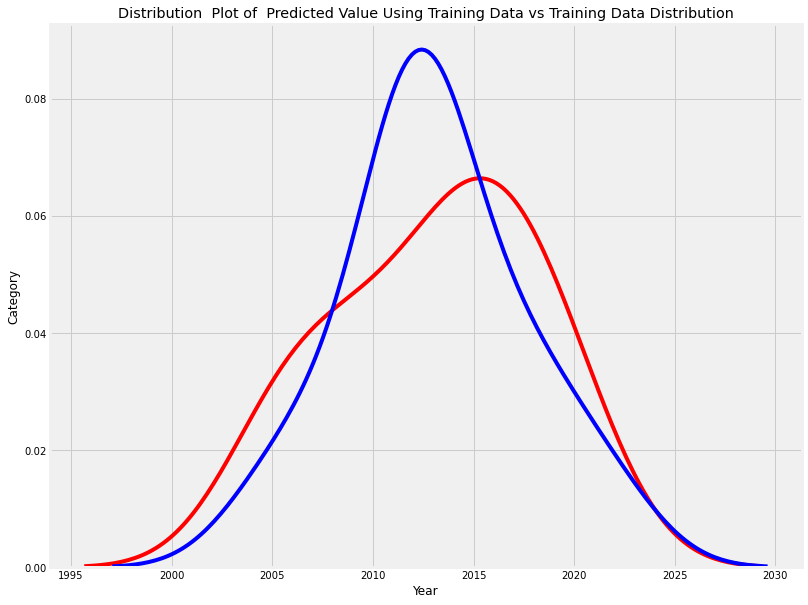

In [31]:
#Check for the Distrbution Plot
%matplotlib inline
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Lawrence\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lawrence\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


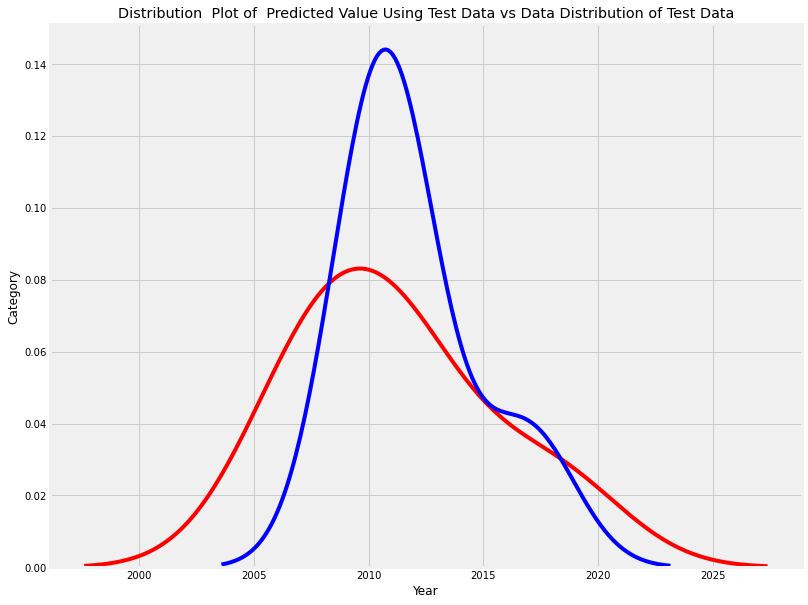

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## Results and Findings
Base on R2 value, there is a stronger case for linear correlation between Years to the underemployment rate. As years progress, there is an expected proportional increase in underemployment rate in the country. More comprehensive data (ie base on monthly unemployment rate) can be used to enhance model accuracy, as evident by the ditribution plot of test data

## Conclusion and Recommendation
1. The variance between unemployment and underemployment curve are significantly equal, while their means are significantly different.
2. Regression analysis indicates that there is a stronger case for linear growth on underemployment rate over the years. Government should take necessary action (ie creation of proper jobs that is inline with educational background).